In [1]:
import torch
from torchvision import transforms, datasets
from torchvision.models import resnet
from torch.utils.data import DataLoader
import os
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:

# Download CIFAR-10 dataset
cifar_dataset = datasets.CIFAR10(root='./data', download=True)

Files already downloaded and verified


In [7]:
# Load CIFAR-10 data into a NumPy array
# print(cifar_dataset.shape)
images_array = []
labels_array = []

for i in range(len(cifar_dataset)):
    image, label = cifar_dataset[i]
    images_array.append(image)
    labels_array.append(label)

# Convert the tuple of NumPy arrays to NumPy arrays
images_array = np.array(images_array)
labels_array = np.array(labels_array)

# Print the shape of the NumPy arrays
print("Images array shape:", images_array.shape)
print("Labels array shape:", labels_array.shape)

Images array shape: (50000, 32, 32, 3)
Labels array shape: (50000,)


In [8]:
images = images_array[:100]
# reshape images to be flattened in final dimension
flat_images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2], images.shape[3]))
N, size, D = flat_images.shape
# print(size)

num_clusters = [5, 10, 20]
output_images = np.zeros((len(num_clusters), N, size, D))
for k in range(len(num_clusters)):
    for i in range(N):
        n = num_clusters[k]
        kmeans = KMeans(n_clusters=n, n_init = "auto").fit(flat_images[i])
        # print(kmeans.labels_)
        # print(kmeans.cluster_centers_)
        assignments = np.array([kmeans.cluster_centers_[kmeans.labels_[j]] for j in range(size)])
        # print(assignments.shape)
        output_images[k][i] = assignments

output_images = np.reshape(output_images, (len(num_clusters),) + images.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 100, 32, 32, 3)


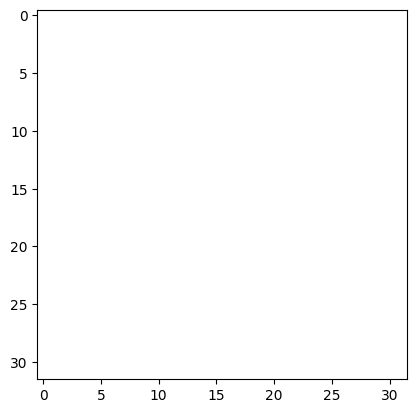

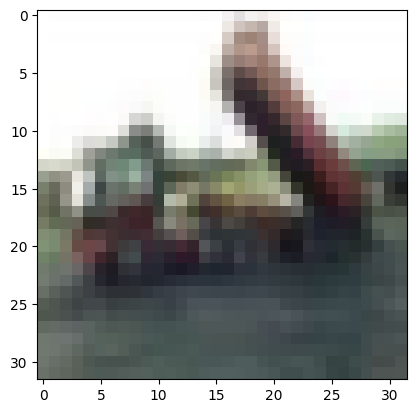

In [9]:
print(output_images.shape)

plt.imshow(output_images[0, 2], interpolation='nearest')
plt.show()
plt.imshow(images[2], interpolation='nearest')